# Installing packages

In [369]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading The Dataset

In [370]:
import pandas as pd

In [371]:
data = pd.read_csv("dataset.csv")
data2 = data.loc[:, ['country', 'year', 'gini_reported']]
data.head()

,Unnamed: 0,id,country,c3,c2,year,gini_reported,palma,ratio_top20bottom20,bottom40,...,gdp_ppp_pc_usd2011,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link
0,0,1,Afghanistan,AFG,AF,2008,29.00,NaN,4.33,22.00,...,1268.0,27722282.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...
1,1,2,Afghanistan,AFG,AF,2012,33.00,NaN,4.11,23.00,...,1773.0,31161378.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...
2,2,3,Afghanistan,AFG,AF,2017,31.00,NaN,4.44,22.00,...,1758.0,36296108.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...
3,3,4,Albania,ALB,AL,1996,27.01,0.93,3.95,22.85,...,4635.0,3098699.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...
4,4,5,Albania,ALB,AL,2002,31.74,1.22,4.83,20.93,...,6088.0,3126183.0,New 2019,Average,13,World Bank,World Bank 2019,PovcalNet,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...


# Data Preporcessing

In [372]:
#checking how many null values are there in each column
data.isnull().sum()

Unnamed: 0                 0
id                         0
country                    0
c3                         0
c2                        10
year                       0
gini_reported             79
palma                   5112
ratio_top20bottom20     4323
bottom40                4367
q1                      4250
q2                      4472
q3                      4451
q4                      4445
q5                      4249
d1                      5155
d2                      5239
d3                      5239
d4                      5239
d5                      5219
d6                      5214
d7                      5208
d8                      5211
d9                      5192
d10                     5049
bottom5                 9898
top5                    9258
resource                   1
resource_detailed          0
scale                    501
scale_detailed           501
sharing_unit             495
reference_unit            37
areacovr                   0
areacovr_detai

In [373]:
# removing unnecessary columns and only keeping the necessary ones
columns_to_keep = ['country', 'year', 'gini_reported', 'palma', 'population']
data = data[columns_to_keep]

In [374]:
# dropping all the rows with null values
data = data.dropna()

In [375]:
print(data.shape)
print(data.dtypes)

(6667, 5)
country           object
year               int64
gini_reported    float64
palma            float64
population       float64
dtype: object


In [376]:
data.shape

(6667, 5)

In [377]:
data.head()

,country,year,gini_reported,palma,population
3,Albania,1996,27.01,0.93,3098699.0
4,Albania,2002,31.74,1.22,3126183.0
5,Albania,2005,30.60,1.14,3086810.0
6,Albania,2008,29.98,1.11,3002683.0
7,Albania,2012,28.96,1.04,2914091.0


In [378]:
# Remove outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-378-697a07c982e6>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-378-697a07c982e6>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-378-697a07c982e6>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [379]:
data.shape

(5651, 5)

# Helper Function

Function to plot the gini index of a given country

In [380]:
def plot_country(country_to_plot):
  # Dropping other columns
  country = data2.loc[data2["country"] == country_to_plot]

  # Storing years and their mean GINI (Mean because we have multiple entries for each year and some of them have NaN values, which should be addressed in future updates)
  years = []
  gini_mean = []

  # Getting Years and mean GINIs from the country
  for year in country["year"]:
    if year not in years:
      years.append(year)
  for year in years:
    gini_mean.append(country.loc[country["year"] == year]["gini_reported"].mean())

  # Create Country/GINI DataFrame
  country_after = pd.DataFrame(gini_mean, index=years, columns= ["GINI"])

  # Plotting Graph
  country_after.index = country_after.index.map(int) # let's change the index values of the Years to type integer for plotting
  country_after.plot(kind='line', figsize=(12,6))

  plt.title(f'GINI over the years in {country_to_plot}')
  plt.ylabel('GINI')
  plt.xlabel('Years')

  plt.show() # need this line to show the updates made to the figure

# Data Visualization

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

In [382]:
columns_to_plot = [
    'year', 'gini_reported', 'palma', 'population'
]

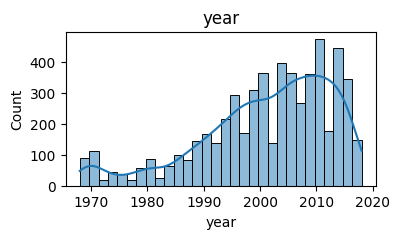

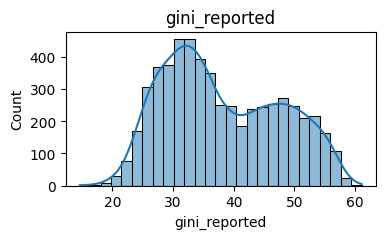

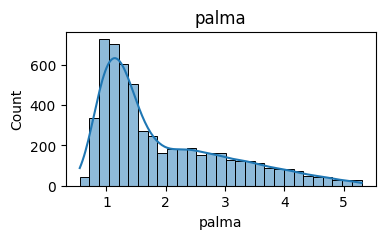

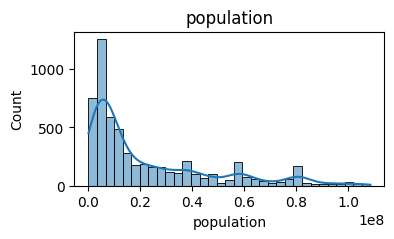

In [383]:
# plotting frequency distribution for each column

for col in columns_to_plot:
    plt.figure(figsize=(4,2))
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()

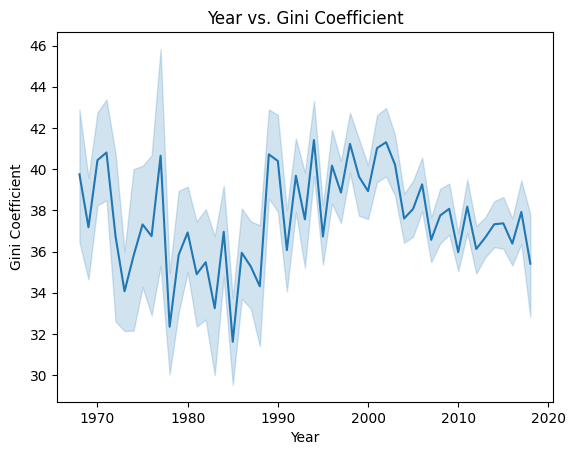

In [384]:
# plotting the relation between year and gini coefficient

sns.lineplot(x="year", y="gini_reported", data=data)
plt.title("Year vs. Gini Coefficient")
plt.xlabel("Year")
plt.ylabel("Gini Coefficient")
plt.show()

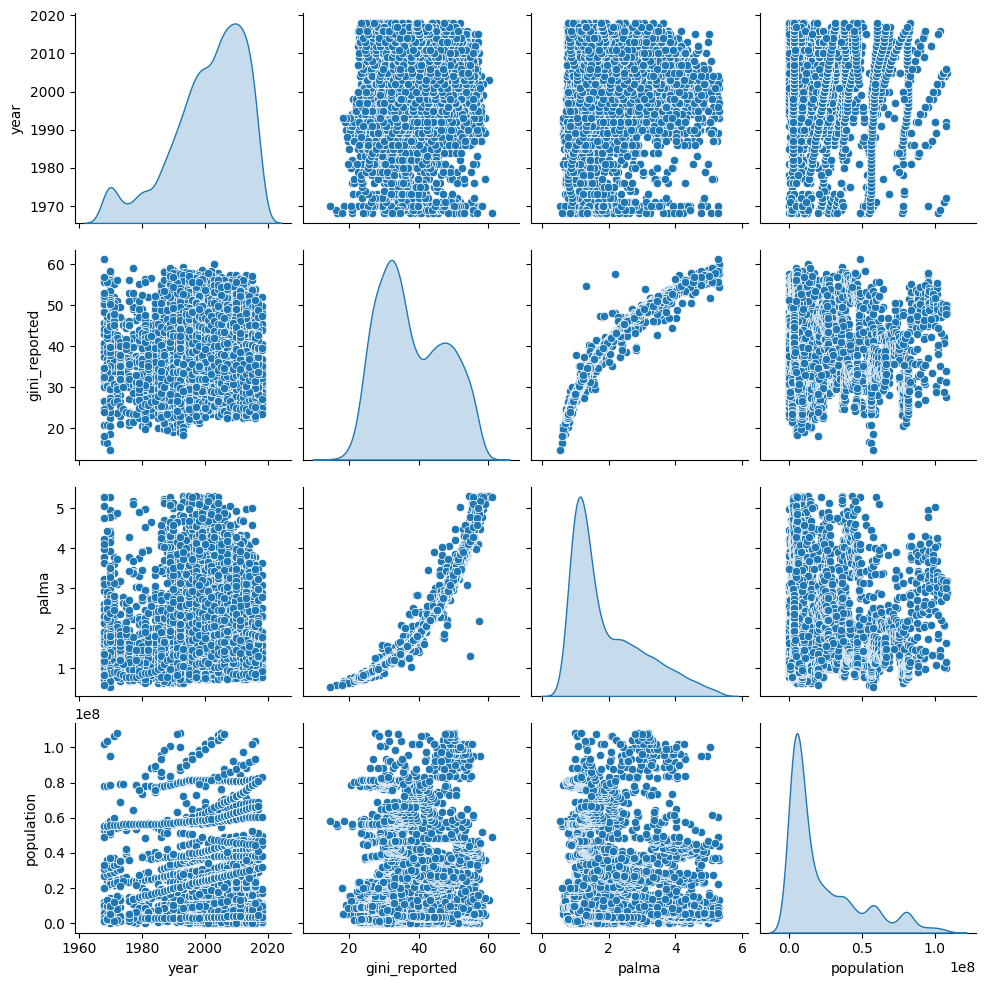

In [385]:
# Pair plot
sns.pairplot(data[columns_to_plot], diag_kind="kde")
plt.show()

<ipython-input-386-97c0e1395d6e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


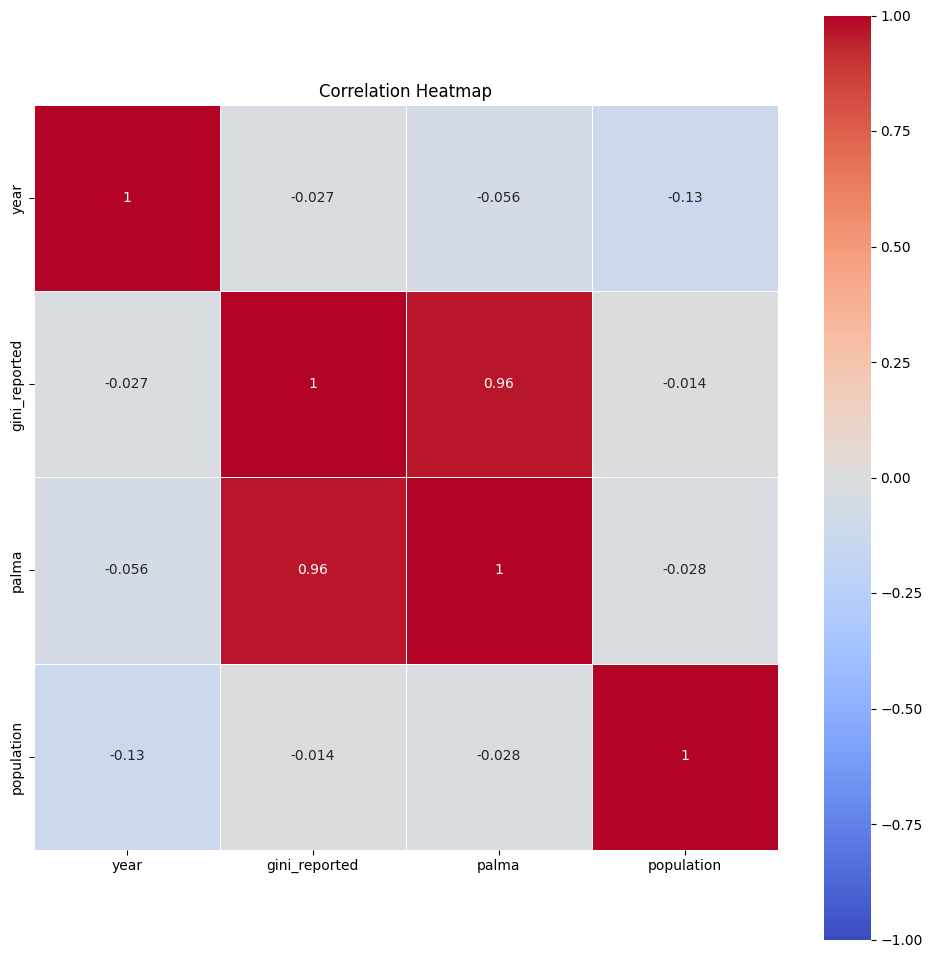

In [386]:
# plotting the corelation matrix for the dataset

correlation_matrix = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Notice that there is a close corelation only between palma and gini reported.**


---

**Therefore, we will use these two columns to train our machine learning models.**

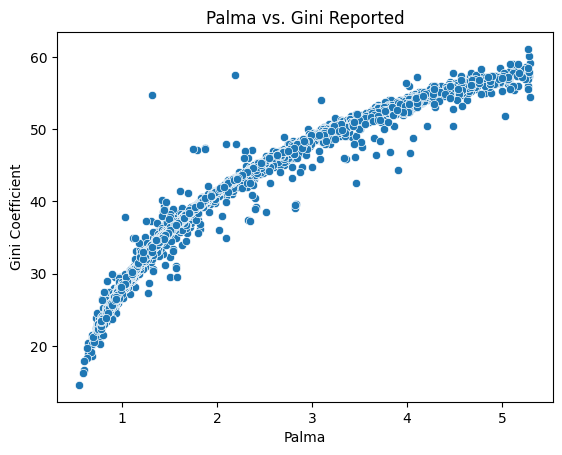

In [387]:
sns.scatterplot(data=data, x='palma', y='gini_reported')
plt.title('Palma vs. Gini Reported')
plt.xlabel('Palma')
plt.ylabel('Gini Coefficient')
plt.show()

# Visualizing Gini coefficient of a single country

Printing list of countries

In [388]:
from tabulate import tabulate

countries = data2.country.unique()
num_rows = int(np.ceil(len(countries) / 5))
countries_2d = np.resize(countries, (num_rows, 5))
print(tabulate(countries_2d, tablefmt='grid'))

+------------------------+--------------------------+-----------------------------------+--------------------------+-----------------------+
| Afghanistan            | Albania                  | Algeria                           | Andorra                  | Angola                |
+------------------------+--------------------------+-----------------------------------+--------------------------+-----------------------+
| Argentina              | Armenia                  | Australia                         | Austria                  | Azerbaijan            |
+------------------------+--------------------------+-----------------------------------+--------------------------+-----------------------+
| Bahamas, The           | Bahrain                  | Bangladesh                        | Barbados                 | Belarus               |
+------------------------+--------------------------+-----------------------------------+--------------------------+-----------------------+
| Belgium    

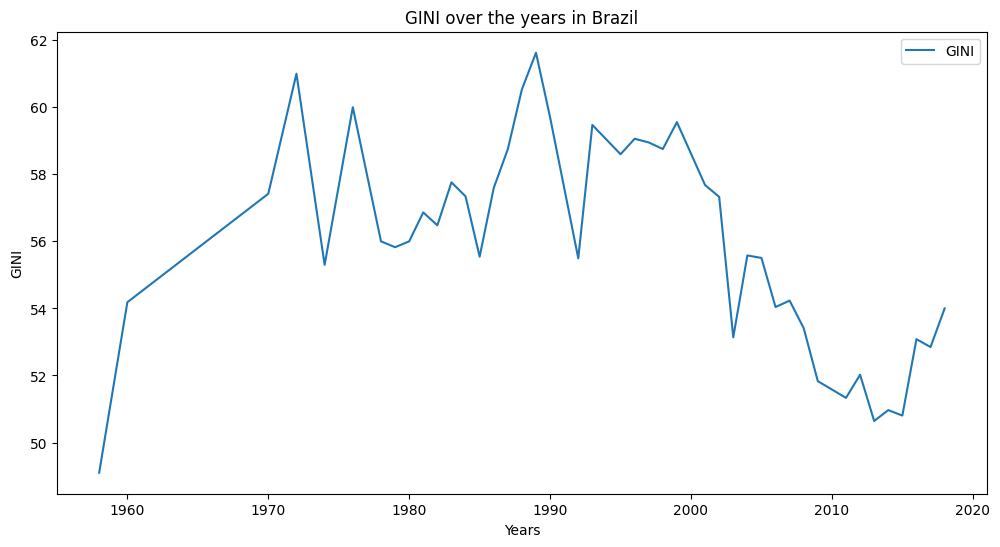

In [389]:
plot_country("Brazil");

# Preparing the Dataset For Machine Learning

In [390]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [391]:
# setting the x and y values to train the model
X = data[['palma']]
y = data['gini_reported']

In [392]:
# splitting the dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [393]:
print(f"Test set size: {len(y_train)}")
print(f"Unique values in y_test: {y_train.nunique()}")
print(f"Unique values in y_pred: {len(np.unique(y_train))}")

Test set size: 4520
Unique values in y_test: 1285
Unique values in y_pred: 1285


# Linear Regression


In [394]:
# create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [395]:
# creating linear regression models of degrees 1,2,3,4 and 5
models = []
degrees = [1, 2, 3, 4, 5]
for d in degrees:
    model = LinearRegression().fit(PolynomialFeatures(degree=d).fit_transform(X_train), y_train)
    models.append(model)

In [396]:
y_preds_linearRegression = []
for model in models:
    y_pred = model.predict(PolynomialFeatures(degree=model.coef_.size - 1).fit_transform(X_test))
    y_preds_linearRegression.append(y_pred)

In [397]:
# evaluate the models using mean squared error and R-squared
mses = []
r2s = []

for y_pred in y_preds_linearRegression:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mses.append(mse)
    r2s.append(r2)

In [398]:
for i in range(len(mses)):
  print(f"Mean squared error: {mses[i]}")
  print(f"R-squared: {r2s[i]}")

Mean squared error: 6.405676091820359
R-squared: 0.928540855238224
Mean squared error: 1.395597037632316
R-squared: 0.9844312810526558
Mean squared error: 0.8092766593903405
R-squared: 0.9909720352501828
Mean squared error: 0.6965922304001532
R-squared: 0.9922290973944724
Mean squared error: 0.6787099743056815
R-squared: 0.9924285846474344


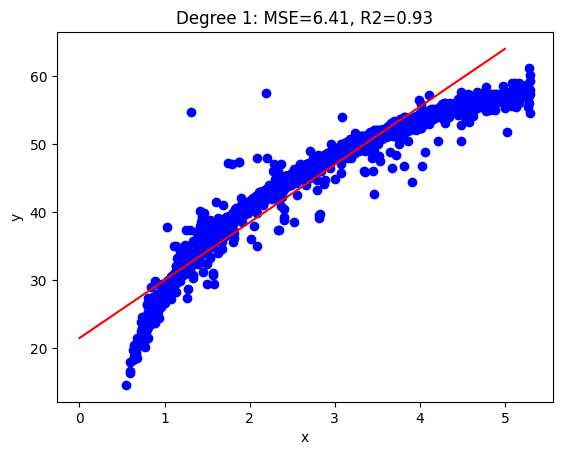

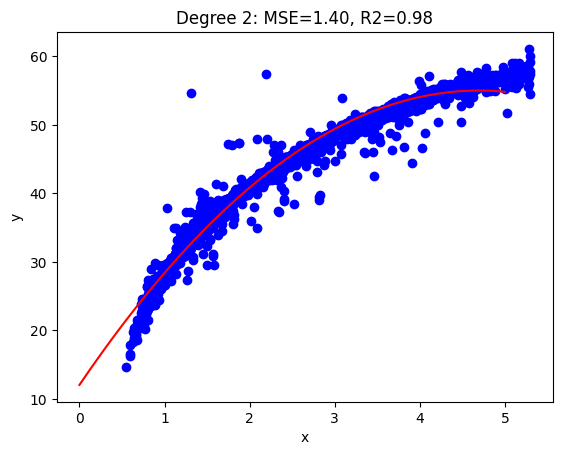

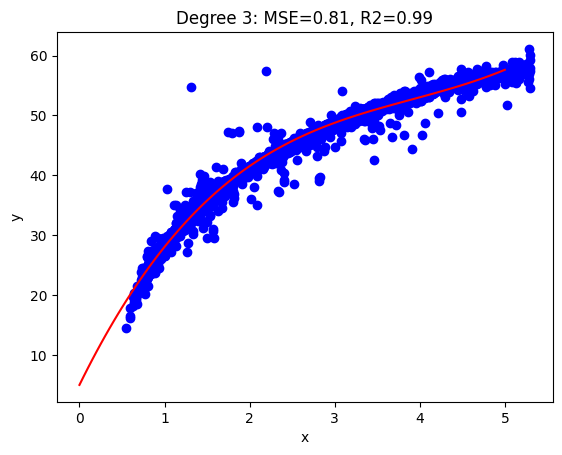

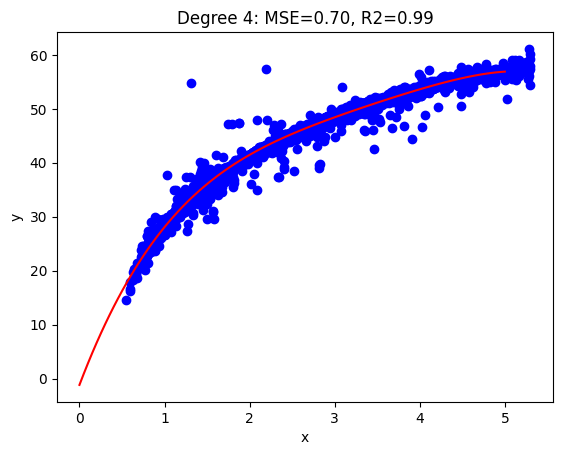

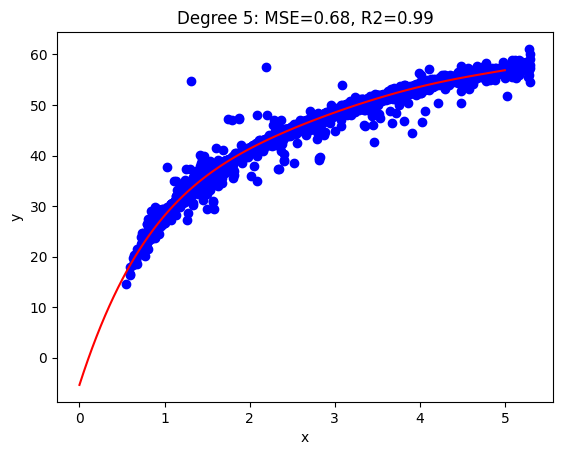

In [399]:
for i, model in enumerate(models):
    fig = plt.figure()
    plt.scatter(X, y, color='blue')
    x_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = PolynomialFeatures(degree=model.coef_.size - 1).fit_transform(x_plot)
    y_plot = model.predict(X_plot_poly)
    plt.plot(x_plot, y_plot, color='red')
    plt.title(f'Degree {degrees[i]}: MSE={mses[i]:.2f}, R2={r2s[i]:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [400]:
# select the best model based on R-squared and mean squared error
best_mse_model_index = np.argmin(mses)
best_r2_model_index = np.argmax(r2s)
best_mse_model = models[best_mse_model_index]
best_r2_model = models[best_r2_model_index]

# print the best models
print(f'The best Linear Regression model based on mean squared error is degree {degrees[best_mse_model_index]} with mse = {mses[-1]}')
print(f'The best Linear Regression model based on R-squared is degree {degrees[best_r2_model_index]} with R-squared = {r2s[-1]}')

The best Linear Regression model based on mean squared error is degree 5 with mse = 0.6787099743056815
The best Linear Regression model based on R-squared is degree 5 with R-squared = 0.9924285846474344


In [401]:
model_linearRegression = models[-1]

# XGB Boost Model

In [402]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (XGBoost): {mse_xgb}")
print(f"R2 Score (XGBoost): {r2_xgb}")

models.append(xgb_model)

Mean Squared Error (XGBoost): 0.7634068933586372
R2 Score (XGBoost): 0.9914837399015051


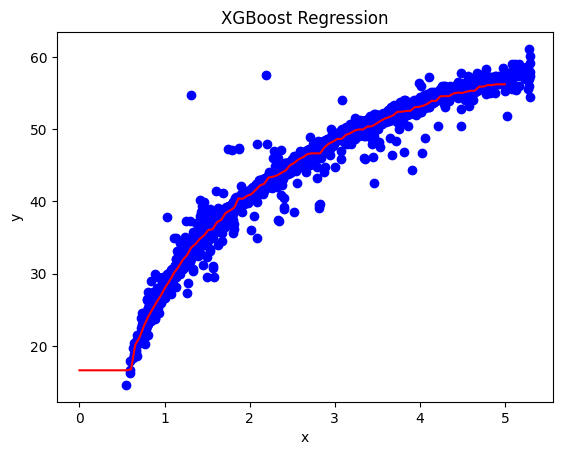

In [403]:
plt.scatter(X, y, color='blue')
x_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = xgb_model.predict(x_plot)
plt.plot(x_plot, y_plot, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('XGBoost Regression')
plt.show()

# Random Forest Regressor

In [404]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

model_GridSearch = grid_search.best_estimator_
models.append(model_GridSearch)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [405]:
y_pred_gridSearch = model_GridSearch.predict(X_test)
mse_gridSearch = mean_squared_error(y_test, y_pred_gridSearch)
r2_gridSearch = r2_score(y_test, y_pred_gridSearch)

print(f"Mean Squared Error (Random Forrest): {mse_gridSearch}")
print(f"R2 Score (Random Forrest): {r2_gridSearch}")

Mean Squared Error (Random Forrest): 0.747558603002395
R2 Score (Random Forrest): 0.991660537051183


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


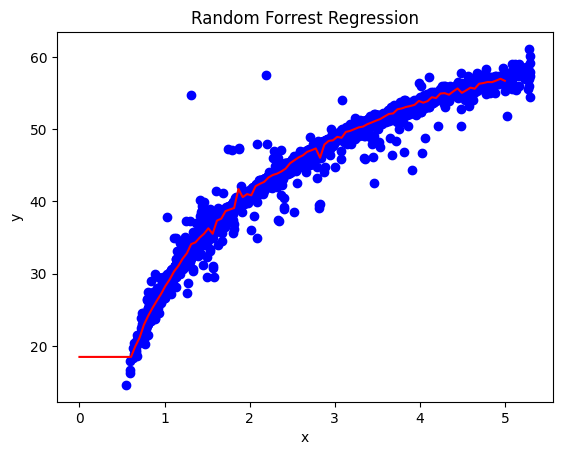

In [406]:
plt.scatter(X, y, color='blue')
x_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model_GridSearch.predict(x_plot)
plt.plot(x_plot, y_plot, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forrest Regression')
plt.show()

# Deep Learning


In [407]:
# define the neural network model
model_deepLearning = Sequential()
model_deepLearning.add(Dense(10, input_dim=1, activation='relu'))
model_deepLearning.add(Dense(10, activation='relu'))
model_deepLearning.add(Dense(1, activation='linear'))

In [408]:
# compile the model
model_deepLearning.compile(loss='mean_squared_error', optimizer='adam')

In [409]:
# fit the model to the training data
model_deepLearning.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [410]:
y_pred_deepLearning = model_deepLearning.predict(X_test)
mse_deepLearning = mean_squared_error(y_test, y_pred_deepLearning)
r2_deepLearning = r2_score(y_test, y_pred_deepLearning)

print(f"Mean Squared Error (Deep Learning): {mse_deepLearning}")
print(f"R2 Score (Deep Learning): {r2_deepLearning}")

models.append(model_deepLearning)

36/36 [==============================] - 0s 897us/step
Mean Squared Error (Deep Learning): 0.8522720963282366
R2 Score (Deep Learning): 0.9904923954575676


4/4 [==============================] - 0s 2ms/step


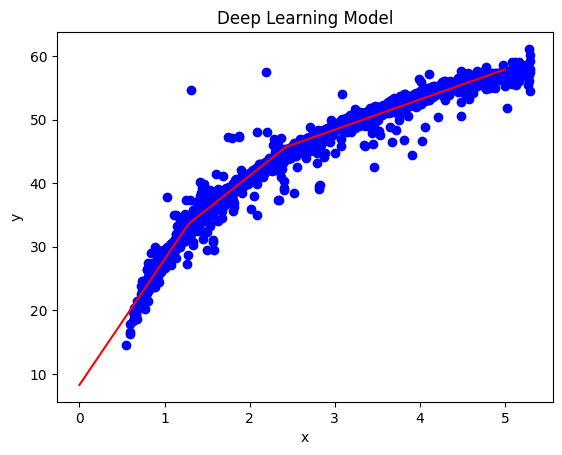

In [411]:
plt.scatter(X, y, color='blue')
x_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model_deepLearning.predict(x_plot)
plt.plot(x_plot, y_plot, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Deep Learning Model')
plt.show()

# Selecting The best model

In [412]:
model_scores = {
    'Linear Regression Order 1': {'MSE': mses[0], 'R2': r2s[0]},
    'Linear Regression Order 2': {'MSE': mses[1], 'R2': r2s[1]},
    'Linear Regression Order 3': {'MSE': mses[2], 'R2': r2s[2]},
    'Linear Regression Order 4': {'MSE': mses[3], 'R2': r2s[3]},
    'Linear Regression Order 5': {'MSE': mses[4], 'R2': r2s[4]},
    'XGBRegressor': {'MSE': mse_xgb, 'R2': r2_xgb},
    'Random Forest Regressor': {'MSE': mse_gridSearch, 'R2': r2_gridSearch},
    'Deep Learning': {'MSE': mse_deepLearning, 'R2': r2_deepLearning}
}


**Since we want to predict numerical values of gini coefficient, therefore we should minimize the measn squared error.**

In [413]:
# Define the model selection criteria
criteria_mse = 'MSE'
# Get the best model based on the selected criteria
best_model_mse = min(model_scores, key=lambda x: model_scores[x][criteria_mse])

# Print the name and scores of the best model
print(f'Best model based on {criteria_mse}: {best_model_mse}')
print(f'MSE: {model_scores[best_model_mse]["MSE"]}, R2: {model_scores[best_model_mse]["R2"]}')


Best model based on MSE: Linear Regression Order 5
MSE: 0.6787099743056815, R2: 0.9924285846474344
